<a href="https://colab.research.google.com/github/rich-hyun/machine_learning_military/blob/main/%EC%9D%BC%EC%B0%A8%EB%B3%84/day4_2_guess_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving project_proof2.xlsx to project_proof2 (72).xlsx


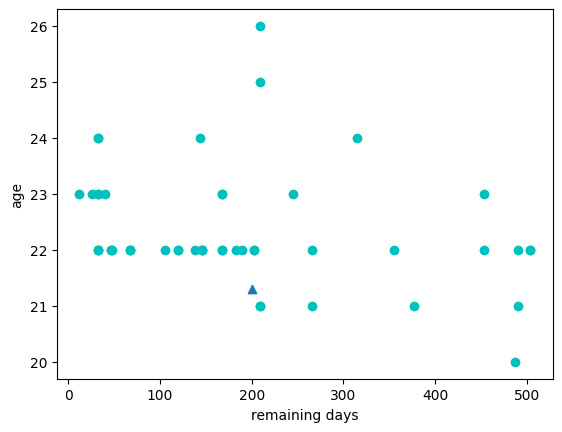

[22.32386761]
[-0.00186242] 22.696350984647275


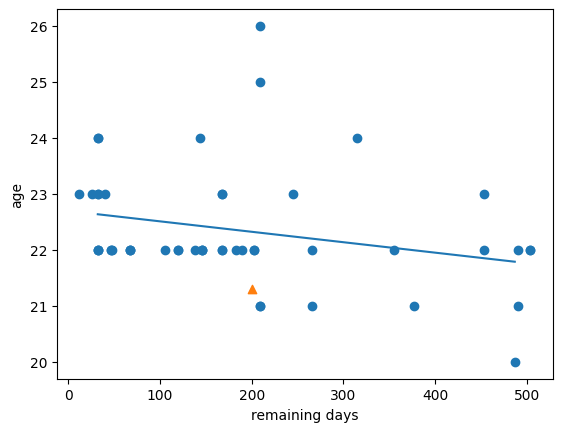

0.07124639216348239
0.28309941242460335
(49, 2) (17, 2)
[22.41719746]
[-3.93292172e-06  1.28880258e-04] 22.54873828104283


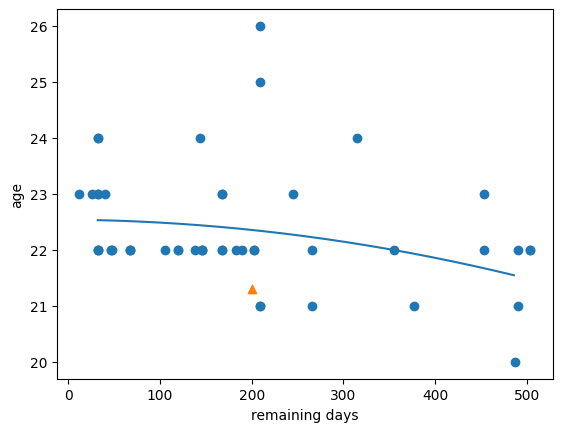

0.07773308246135524
0.21999034854167077


In [78]:
from google.colab import files
uploaded=files.upload()

import pandas as pd
workbook=pd.read_excel('project_proof2.xlsx')
base=workbook.to_numpy()

import matplotlib.pyplot as plt
import numpy as np

"""넘파이로 데이터 준비하기"""
age=[]
for k in range(66):
  age.append(base[k][1])
rdays=[]
for k in range(66):
  rdays.append(base[k][3])

age2=np.array(age)
rdays2=np.array(rdays)
base_data=[[l,w] for l,w in zip(age,rdays)]
base_target=[1]*52+[0]*14

from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(
    age2,rdays,stratify=base_target,random_state=42)
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

#최근접 이웃3명
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input,train_target)

distances,indexes=knr.kneighbors([[200]])


#훈련 세트의 산점도
plt.scatter(train_input,train_target,color='c')


#이웃 샘플의 산점도 표시해주기
plt.scatter(200,21.3,marker='^')
plt.xlabel('remaining days')
plt.ylabel('age')
plt.show()

from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(train_input, train_target)
print(lr.predict([[200]]))

print(lr.coef_, lr.intercept_)

#산점도에 직선을 추가해보겠습니다.

plt.scatter(train_input,train_target)
plt.plot([32,487],[32*lr.coef_+lr.intercept_,487*lr.coef_+lr.intercept_])
plt.scatter(200,21.3,marker='^')
plt.xlabel('remaining days')
plt.ylabel('age')
plt.show()

print(lr.score(train_input, train_target))
print(lr.score(test_input,test_target))

train_poly=np.column_stack((train_input**2,train_input))
test_poly=np.column_stack((test_input**2,test_input))

print(train_poly.shape,test_poly.shape)

lr=LinearRegression()
lr.fit(train_poly,train_target)
print(lr.predict([[200**2,200]]))
print(lr.coef_, lr.intercept_)

#구간별 직선을 그리기 위해 32부터 487까지 정수 배열을 만듭니다.
point=np.arange(32,487)

#훈련 세트의 산점도를 그립니다.
plt.scatter(train_input,train_target)

#32에서 487까지 2차 방정식 그래프를 그립니다
plt.plot(point,-3.93292172e-06*(point**2)-1.28880258e-04*point+22.54)

#잔여일수 200의 데이터
plt.scatter(200,21.3,marker='^')
plt.xlabel('remaining days')
plt.ylabel('age')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly,test_target))